<img src='https://training.dwit.edu.np/frontend/images/computer-training-institute.png'>
<h1>Data Science and Machine learning in Python</h1>
<h3>Instructor: <a href='https://www.kaggle.com/atishadhikari'> Atish Adhikari</a></h3>
<hr>

## Auto Encoders

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.datasets import mnist

In [3]:
(X_train, _ ), (X_test, _) = mnist.load_data()

In [4]:
X_train = X_train.reshape(60000, 28*28) / 255

In [5]:
input_layer = Input(shape=(784, ))

encoder_layer = Dense(units=400, activation="relu") (input_layer)
encoder_layer = Dense(units=200, activation="relu") (encoder_layer)
encoder_layer = Dense(units=100, activation="relu") (encoder_layer)

middle = Dense(units=50, activation="sigmoid") (encoder_layer)

decoder_layer = Dense(units=150, activation="relu") (middle)
decoder_layer = Dense(units=450, activation="relu") (decoder_layer)
output_layer = Dense(units=784, activation="sigmoid") (decoder_layer)

auto_encoder = Model(inputs=input_layer, outputs=output_layer)

auto_encoder.compile(loss="mse", optimizer="adam")

In [6]:
auto_encoder.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0373
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0194
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0153
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0131
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0115


In [7]:
encoder = Model(inputs=input_layer, outputs=middle)

In [8]:
encoder.compile(loss="mse", optimizer="adam")

In [9]:
X_compressed = encoder.predict(X_train)

In [10]:
X_compressed.shape

(60000, 50)

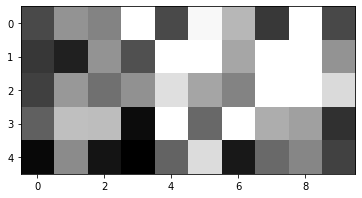

In [11]:
plt.imshow(X_compressed[0].reshape(5, 10), cmap="binary_r")
plt.show()

In [12]:
auto_encoder.layers

In [13]:
decoder_input = Input(shape=(50,))

decoder_1 = auto_encoder.layers[-3] (decoder_input)
decoder_2 = auto_encoder.layers[-2] (decoder_1)
decoder_output = auto_encoder.layers[-1] (decoder_2)

decoder = Model(decoder_input, decoder_output)

In [14]:
decoder.compile(loss="mse", optimizer="adam")

In [15]:
X_reconstructed = decoder.predict(X_compressed)

In [16]:
X_reconstructed.shape

(60000, 784)

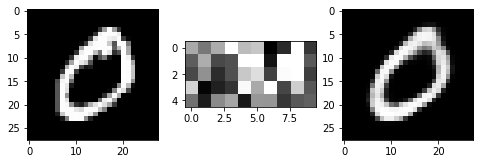

In [17]:
plt.figure(figsize=(8, 10))
plt.subplot(1,3,1)
plt.imshow(X_train[1].reshape(28,28), cmap="binary_r")

plt.subplot(1,3,2)
plt.imshow(X_compressed[1].reshape(5,10), cmap="binary_r")

plt.subplot(1,3,3)
plt.imshow(X_reconstructed[1].reshape(28,28), cmap="binary_r")

plt.show()